# Plot turbine power

In [1]:
import numpy as     np
import sys
import os.path
import argparse
import time
import pandas as pd
import utm
import matplotlib.pyplot as plt

In [2]:
def isInsideBox(x,y,box):
    if (box[0][0] <= x) and (x <= box[0][1]) and (box[1][0] <= y) and (y <= box[1][1]):
        return True
    else:
        return False

def avgcsv(filelist, varlist):
    avgds = None
    for ifile, file in enumerate(filelist):
        ds = pd.read_csv(file)
        if avgds is None:
            avgds = ds.copy()
            #print(avgds)
        else:
            for v in varlist:
                avgds[v] += ds[v]
    for v in varlist:
        avgds[v] = avgds[v]/len(filelist)
    return avgds

In [3]:
turbinecsv = 'turbines_farmrun.csv'

In [4]:
turbinedf = pd.read_csv(turbinecsv)

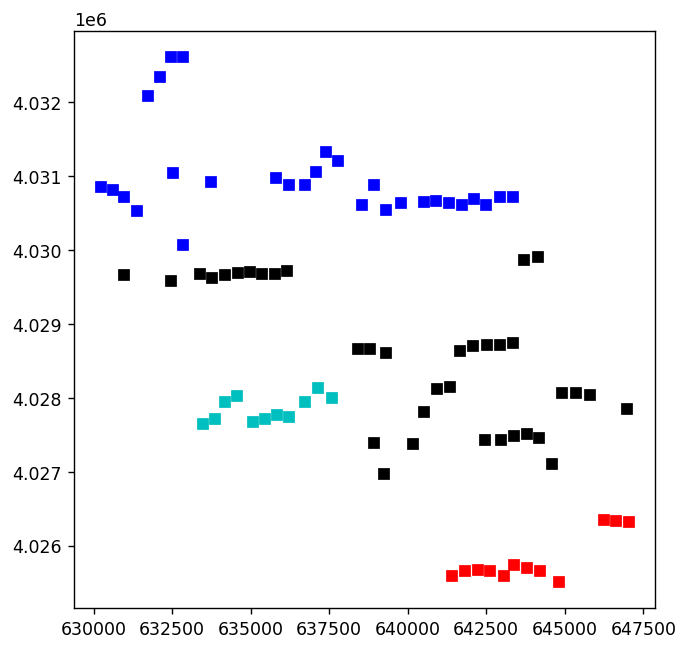

In [5]:
plt.figure(figsize=(6,6), dpi=125)
frontbox = [[0, 700000], [4.02E6, 4.0265E6]]
frontturbs = []
backbox = [[0, 700000], [4.03E6, 4.035E6]]
backturbs = []
midbox = [[632500, 637700], [4.027E6, 4.029E6]]
midturbs = []

KPturbs = turbinedf[:88]
for r in KPturbs.iterrows():
    i = r[0]+1
    #print(i)
    x, y = r[1][' x'], r[1][' y']

    color='k'
    #if (frontbox[0][0] <= x) and (x <= frontbox[0][1]) and (frontbox[1][0] <= y) and (y <= frontbox[1][1]):
    if isInsideBox(x,y, frontbox):
        frontturbs.append(i)
        color='r'
    if isInsideBox(x,y, backbox):
        backturbs.append(i)
        color='b'
    if isInsideBox(x,y, midbox):
        midturbs.append(i)
        color='c'
    plt.plot(x,y , 's', color=color)

In [6]:
# Average over all powers
varlist = ['GenPwr', 'RotThrust']

allturbs = ['OpenFAST_KP/T%02i.csv'%(i+1) for i in range(88)]
fullavg = avgcsv(allturbs, varlist)

frontlist = ['OpenFAST_KP/T%02i.csv'%(i) for i in frontturbs]
frontavg = avgcsv(frontlist, varlist)

backlist = ['OpenFAST_KP/T%02i.csv'%(i) for i in backturbs]
backavg = avgcsv(backlist, varlist)

midlist = ['OpenFAST_KP/T%02i.csv'%(i) for i in midturbs]
midavg = avgcsv(midlist, varlist)


(0.0, 1000.0)

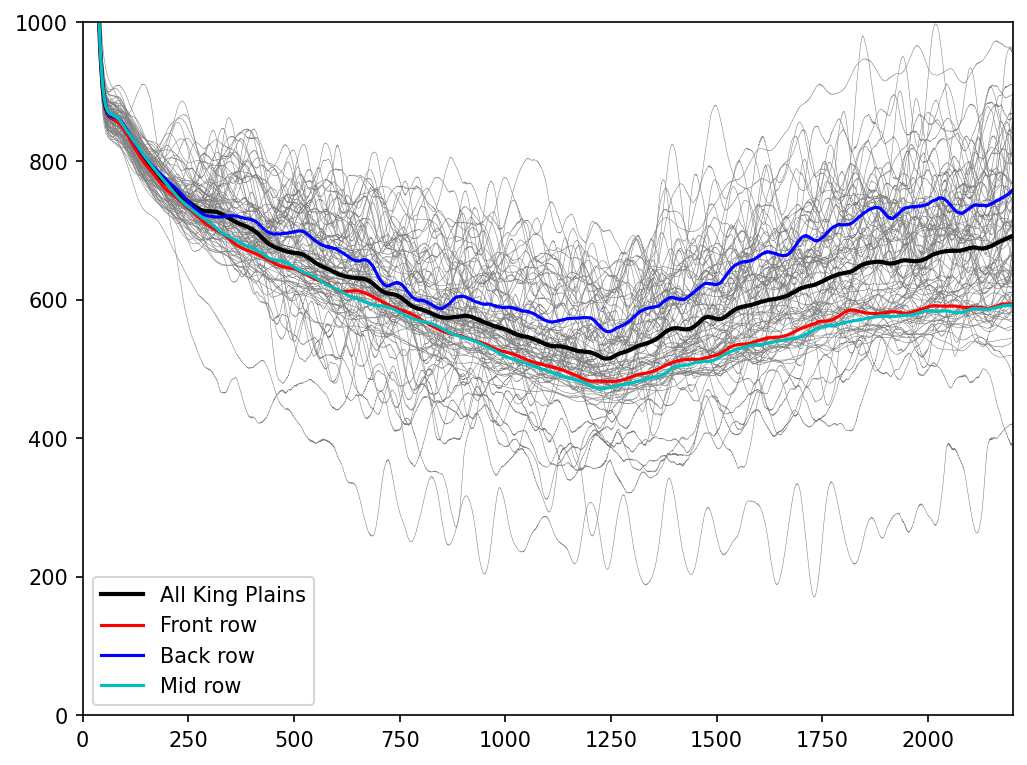

In [7]:
plt.figure(figsize=(8,6), dpi=150)
for t in allturbs:
    df = pd.read_csv(t)
    plt.plot(df['Time'], df['GenPwr'], 'gray', lw=0.25,)    

plt.plot(fullavg['Time'], fullavg['GenPwr'], 'k-', lw=2, label='All King Plains')
plt.plot(frontavg['Time'], frontavg['GenPwr'], 'r', label='Front row')
plt.plot(backavg['Time'], backavg['GenPwr'], 'b', label='Back row')
plt.plot(midavg['Time'], midavg['GenPwr'], 'c', label='Mid row')
plt.legend()
plt.xlim([0, 2200])
plt.ylim([0, 1000])